In [ ]:
import pandas as pd
df_data = pd.read_csv('reviews_clean_lda.csv')

In [ ]:
import numpy as np
import ast

clean_data = []
for index, row in df_data.iterrows():
  # temp = ast.literal_eval(row["text_processed"])
  temp = row["text_processed"].split()
  clean_data.append(temp)

clean_data[0]
len(clean_data)

4066

In [ ]:
import gensim
from gensim import corpora, models
from gensim.models import CoherenceModel

def create_corpus(clean_data):
  id2word_sets = list()
  corpus_tfidf_sets = list()
  corpus_bow_sets = list()

  for i in range(2, 6):
    id2word = corpora.Dictionary(clean_data)
    id2word.filter_extremes(no_below=i)
    corpus_bow = [id2word.doc2bow(text) for text in clean_data]
    tfidf = models.TfidfModel(corpus_bow)
    corpus_tfidf = tfidf[corpus_bow]

    id2word_sets.append(id2word)
    corpus_tfidf_sets.append(corpus_tfidf)
    corpus_bow_sets.append(corpus_bow)

    print("below: " + str(i) + ": ", id2word)
    print(corpus_tfidf[0])
  return id2word_sets, corpus_tfidf_sets, corpus_bow_sets

id2word_sets, corpus_tfidf_sets, corpus_bow_sets = create_corpus(clean_data)

below: 2:  Dictionary(2694 unique tokens: ['buka', 'busuk', 'dikit', 'hubung', 'lancar']...)
[(0, 0.14395987834147594), (1, 0.2826532265790138), (2, 0.33936084865266997), (3, 0.6581859076057104), (4, 0.26858475280889116), (5, 0.18747589664436687), (6, 0.09811022062430873), (7, 0.35725840330232217), (8, 0.25693268059415475), (9, 0.2011210248108623)]
below: 3:  Dictionary(1878 unique tokens: ['buka', 'dikit', 'hubung', 'lancar', 'males']...)
[(0, 0.15007980866723333), (1, 0.353787540123733), (2, 0.6861662861830506), (3, 0.28000265613506825), (4, 0.19544575212382834), (5, 0.10228101960929556), (6, 0.37244594417614374), (7, 0.26785523847459775), (8, 0.20967095325667418)]
below: 4:  Dictionary(1483 unique tokens: ['buka', 'dikit', 'hubung', 'lancar', 'males']...)
[(0, 0.15007980866723333), (1, 0.353787540123733), (2, 0.6861662861830506), (3, 0.28000265613506825), (4, 0.19544575212382834), (5, 0.10228101960929556), (6, 0.37244594417614374), (7, 0.26785523847459775), (8, 0.20967095325667418)]

In [ ]:
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=len(clean_data)//2 + 1,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=clean_data, dictionary=dictionary, coherence='u_mass')
    
    return coherence_model_lda.get_coherence(), lda_model

In [ ]:
import numpy as np
import tqdm

# id2word below range
id2word_sets, corpus_tfidf_sets, corpus_bow_sets = create_corpus(clean_data)
below_title = list(np.arange(2,6))

# Topics range
min_topics = 2
max_topics = 10
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))

model_results = {'Below': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(below_title)))
    
    # iterate through id2word
    for i in range(len(below_title)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_bow_sets[i], dictionary=id2word_sets[i], 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Below'].append(below_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                  
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

In [ ]:
num_topics = 9
alpha=0.31
beta=0.91

lda_model = gensim.models.LdaModel(corpus=corpus_tfidf_sets[1],
                         id2word=id2word_sets[1],
                         num_topics=num_topics, 
                         random_state=100,
                         chunksize=len(clean_data)// 2 + 1,
                         passes=10,
                         alpha=alpha,
                         eta=beta)


In [ ]:
num_topics = 9
alpha=0.61
beta=0.91

lda_model_2 = gensim.models.LdaModel(corpus=corpus_bow_sets[1],
                         id2word=id2word_sets[1],
                         num_topics=num_topics, 
                         random_state=100,
                         chunksize=len(clean_data)// 2 + 1,
                         passes=10,
                         alpha=alpha,
                         eta=beta)


In [ ]:
from pprint import pprint

# Print the Keyword in the topics
pprint(lda_model.print_topics())
print("------------------------------")
pprint(lda_model_2.print_topics())
# doc_lda = lda_model[corpus_tfidf]

[(0,
  '0.006*"offline" + 0.004*"gg" + 0.004*"episode" + 0.004*"online" + '
  '0.003*"noni" + 0.003*"droid" + 0.002*"war" + 0.002*"si" + 0.002*"u" + '
  '0.002*"gaming"'),
 (1,
  '0.004*"nyesel" + 0.002*"anime" + 0.002*"cocok" + 0.002*"keren" + '
  '0.002*"tagih" + 0.002*"download" + 0.002*"slot" + 0.002*"anjim" + '
  '0.002*"misteri" + 0.002*"rugi"'),
 (2,
  '0.004*"dimainkan" + 0.003*"guild" + 0.003*"kek" + 0.002*"senang" + '
  '0.002*"seru" + 0.002*"puas" + 0.002*"nyangka" + 0.002*"bgt" + 0.002*"mah" + '
  '0.002*"nyata"'),
 (3,
  '0.005*"bang" + 0.003*"cantik" + 0.003*"lagu" + 0.003*"novel" + 0.002*"ka" + '
  '0.002*"visual" + 0.002*"kode" + 0.002*"keep" + 0.002*"gemes" + '
  '0.002*"kuntilanak"'),
 (4,
  '0.014*"indonesia" + 0.014*"anak" + 0.013*"bangsa" + 0.010*"keren" + '
  '0.009*"karya" + 0.008*"hantu" + 0.008*"lokal" + 0.007*"seru" + 0.006*"rpg" '
  '+ 0.006*"dukung"'),
 (5,
  '0.013*"akun" + 0.010*"login" + 0.010*"masuk" + 0.006*"jaring" + '
  '0.006*"sinyal" + 0.006*"downlo

In [ ]:
for i in range(9):
  print(str(i) + ": ", lda_model.print_topic(i, topn=100).replace(" + ", ", "))
  print('-----------------------------------------')

0:  0.006*"offline", 0.004*"gg", 0.004*"episode", 0.004*"online", 0.003*"noni", 0.003*"droid", 0.002*"war", 0.002*"si", 0.002*"u", 0.002*"gaming", 0.002*"nusantara", 0.002*"nanya", 0.001*"banged", 0.001*"gilaaa", 0.001*"nyi", 0.001*"webtoon", 0.001*"sempurna", 0.001*"komik", 0.001*"bnyak", 0.001*"stars", 0.001*"blorong", 0.001*"ps", 0.001*"give", 0.001*"persona", 0.001*"thank", 0.001*"diamon", 0.001*"karakternya", 0.001*"kaya", 0.001*"jin", 0.001*"ditunggu", 0.001*"xd", 0.001*"wkwk", 0.001*"utk", 0.001*"mo", 0.001*"mode", 0.001*"deskripsinya", 0.001*"v", 0.001*"bnyk", 0.001*"arena", 0.001*"ngeliat", 0.001*"nyelesaiin", 0.001*"jir", 0.001*"anjay", 0.001*"collab", 0.001*"jd", 0.001*"afk", 0.001*"5", 0.001*"dn", 0.001*"kecuali", 0.001*"kayak", 0.001*"sumpah", 0.001*"sibuk", 0.001*"jujur", 0.001*"didownload", 0.001*"tu", 0.001*"seru", 0.001*"hati", 0.001*"style", 0.001*"please", 0.001*"muncul", 0.001*"iklan", 0.001*"gini", 0.001*"knp", 0.001*"pliss", 0.001*"nyaa", 0.001*"great", 0.001*"min

In [ ]:
for i in range(9):
  print(str(i) + ": ", lda_model_2.print_topic(i, topn=100).replace(" + ", ", "))
  print('-----------------------------------------')

0:  0.068*"update", 0.037*"chapter", 0.016*"min", 0.015*"ya", 0.014*"si", 0.012*"ditunggu", 0.010*"lg", 0.009*"bug", 0.009*"offline", 0.008*"versi", 0.008*"ny", 0.007*"suka", 0.007*"jd", 0.007*"afk", 0.006*"muncul", 0.006*"online", 0.005*"nusantara", 0.005*"main", 0.004*"new", 0.004*"war", 0.004*"story", 0.004*"blm", 0.004*"tingkatkan", 0.004*"wkwkwk", 0.003*"cek", 0.003*"trs", 0.003*"coba", 0.003*"mode", 0.003*"gambar", 0.003*"nice", 0.003*"rilis", 0.003*"sm", 0.003*"selesai", 0.003*"anjir", 0.003*"doang", 0.003*"free", 0.003*"u", 0.003*"seru", 0.003*"aj", 0.003*"droid", 0.003*"store", 0.002*"arena", 0.002*"lgi", 0.002*"thank", 0.002*"cuman", 0.002*"komentar", 0.002*"hero", 0.002*"sabar", 0.002*"donk", 0.002*"gini", 0.002*"mohon", 0.002*"informasi", 0.002*"tolong", 0.002*"version", 0.002*"noni", 0.002*"kesan", 0.002*"disuruh", 0.002*"tunggu", 0.002*"apk", 0.002*"sya", 0.002*"kualitas", 0.002*"komik", 0.002*"next", 0.002*"abis", 0.002*"w", 0.002*"tutup", 0.002*"pas", 0.002*"dimana", 0.

In [ ]:
# id2word_sets[1].token2id
id2word_sets[1].get(133)

'akun'

In [ ]:
lda_model.get_term_topics(133,  minimum_probability=0.0)

[(0, 0.00025661447),
 (1, 0.00025840302),
 (2, 0.00023618054),
 (3, 0.0002514258),
 (4, 0.00014947064),
 (5, 0.012992216),
 (6, 0.00018343658),
 (7, 0.000117146876),
 (8, 0.00025492773)]

In [ ]:
import math

umass_tfidf = CoherenceModel(model=lda_model, texts=clean_data, dictionary=id2word_sets[1], coherence='u_mass').get_coherence() 
umass_bow = CoherenceModel(model=lda_model_2, texts=clean_data, dictionary=id2word_sets[1], coherence='u_mass').get_coherence()
cv_tfidf = CoherenceModel(model=lda_model, texts=clean_data, dictionary=id2word_sets[1], coherence='c_v').get_coherence()
cv_bow = CoherenceModel(model=lda_model_2, texts=clean_data, dictionary=id2word_sets[1], coherence='c_v').get_coherence()
perplexity_tfidf = math.pow(2.0, -1 * lda_model.log_perplexity(corpus_tfidf_sets[1]))
perplexity_bow = math.pow(2.0, -1 * lda_model_2.log_perplexity(corpus_bow_sets[1]))


print('cv','umass', 'perplexity')
print('tfidf: ', cv_tfidf, umass_tfidf, perplexity_tfidf)
print('umass: ', cv_bow, umass_bow, perplexity_bow)
print(lda_model.log_perplexity(corpus_tfidf_sets[1]), lda_model_2.log_perplexity(corpus_bow_sets[1]))
print(np.exp2(-lda_model.log_perplexity(corpus_tfidf_sets[1])), np.exp2(-lda_model_2.log_perplexity(corpus_bow_sets[1])))
# print(len(corpus_tfidf_sets[2]))

cv umass perplexity
tfidf:  0.5223441718658146 -11.337934319163756 320.24788756448487
umass:  0.4127283324401639 -4.726704000490836 120.35042249056082
-8.323045401399845 -6.91109740234558
320.24644273083 120.3504225299277


In [ ]:
!pip install pyldavis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 29.1 MB/s eta 0:00:00


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models
from IPython.core.display import HTML

pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, id2word)
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf_sets[1], dictionary=lda_model.id2word, sort_topics=False)
pyLDAvis.save_html(vis, 'lda_result.html')
display(HTML('lda_result.html'))

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models
from IPython.core.display import HTML

pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, id2word)
vis = pyLDAvis.gensim_models.prepare(lda_model_2, corpus_tfidf_sets[1], dictionary=lda_model_2.id2word, sort_topics=False)
pyLDAvis.save_html(vis, 'lda_result_2.html')
display(HTML('lda_result_2.html'))

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [ ]:
import pandas as pd
df_klasf = pd.read_csv('reviews_clean_klasifikasi.csv')

clean_klasf = []
for index, row in df_klasf.iterrows():
  # temp = ast.literal_eval(row["text_processed"])
  temp = row["text_processed"].split()
  clean_klasf.append(temp)

print(clean_klasf[2])
len(clean_klasf)

['segi', 'gameplay', 'bagus', 'tarik']


4276

In [ ]:
bow = id2word_sets[1].doc2bow(clean_klasf[2])
topic_prob = lda_model.get_document_topics(bow)
print(topic_prob)

[(0, 0.053901568), (1, 0.053963143), (2, 0.05401138), (3, 0.053913906), (4, 0.054865874), (5, 0.05387791), (6, 0.0545672), (7, 0.5669947), (8, 0.053904284)]


In [ ]:
from operator import itemgetter

def topic_labelling(clean_data, dictionary, lda_model):
  label_topic = list()
  for document in clean_data:
    bow = dictionary.doc2bow(document)
    topic_prob = lda_model.get_document_topics(bow)
    topic = max(topic_prob,key=itemgetter(1))[0]
    if topic == 4:
      topic_name = 'karya bangsa'
    elif topic == 5:
      topic_name = 'koneksi'
    elif topic == 6:
      topic_name = 'perangkat hp'
    elif topic == 7:
      topic_name = 'bahasa atau cerita'
    else:
      topic_name = 'karakter gacha'

    label_topic.append(topic_name)
    
  return label_topic

In [ ]:
label_topic = topic_labelling(clean_klasf, id2word_sets[1], lda_model)
df_klasf["topic"] = label_topic
df_klasf.to_csv('reviews_clean_klasf_topic.csv', index=None, header=True)
print(label_topic)

['koneksi', 'koneksi', 'bahasa atau cerita', 'bahasa atau cerita', 'karya bangsa', 'perangkat hp', 'bahasa atau cerita', 'bahasa atau cerita', 'perangkat hp', 'karya bangsa', 'koneksi', 'bahasa atau cerita', 'koneksi', 'bahasa atau cerita', 'perangkat hp', 'bahasa atau cerita', 'bahasa atau cerita', 'koneksi', 'koneksi', 'koneksi', 'koneksi', 'bahasa atau cerita', 'bahasa atau cerita', 'karakter gacha', 'karya bangsa', 'perangkat hp', 'karya bangsa', 'bahasa atau cerita', 'perangkat hp', 'bahasa atau cerita', 'koneksi', 'karya bangsa', 'koneksi', 'perangkat hp', 'bahasa atau cerita', 'bahasa atau cerita', 'bahasa atau cerita', 'bahasa atau cerita', 'bahasa atau cerita', 'bahasa atau cerita', 'bahasa atau cerita', 'perangkat hp', 'bahasa atau cerita', 'bahasa atau cerita', 'koneksi', 'koneksi', 'bahasa atau cerita', 'koneksi', 'karya bangsa', 'bahasa atau cerita', 'perangkat hp', 'koneksi', 'koneksi', 'koneksi', 'koneksi', 'bahasa atau cerita', 'bahasa atau cerita', 'bahasa atau cerita'

In [ ]:
df_klasf

,content,score,text_processed,topic
0,"Game nya bagus sebenernya, tp busuk banget ser...",2,bagus busuk banget servernya dikit dikit hubun...,koneksi
1,Ga bsa di mainkn bru instal pas masuk semua ly...,1,tidak mainkan instal pas masuk layarnya hitam ...,koneksi
2,"Dari segi gameplay bagus, storynya juga menarik",5,segi gameplay bagus tarik,bahasa atau cerita
3,Mantap ni game.. game play bagus.. story bagus...,5,play bagus story bagus suka banget battle sema...,bahasa atau cerita
4,Tolong kembangkan menjadi game yang mirip deng...,5,tolong kembangkan pokemon go,karya bangsa
...,...,...,...,...
4271,kok saat mau masuk kenapa asset checking failed?,5,masuk asset checking failed,koneksi
4272,Waah akhirnya launching juga.(ﾉ◕ヮ◕)ﾉ*.✧ Semoga...,5,waah launching moga code atma jembatan makhluk...,bahasa atau cerita
4273,"Suka banget, Banyak Mitologi yang ada. Game Mo...",5,suka banget mitologi mobile folklor nusantara,karya bangsa
4274,Salah satu game indo terkeren yg pernah gue coba,5,salah indonesia keren coba,bahasa atau cerita


bahasa atau cerita    2565
karya bangsa           587
koneksi                480
perangkat hp           388
karakter gacha         256
Name: topic, dtype: int64


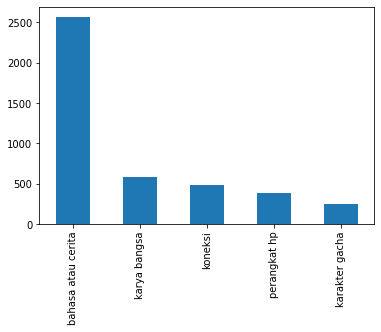

In [ ]:
import matplotlib.pyplot as plt

print(df_klasf.topic.value_counts())
df_klasf.topic.value_counts().plot(kind='bar')
plt.show()

In [ ]:
#saving model to disk.
lda_model.save('lda_model/lda_models')

#loading model from disk
# from gensim import  models
# lda = models.ldamodel.LdaModel.load(temp_file)


In [ ]:
!zip -r lda_model.zip lda_model/

  adding: lda_model/ (stored 0%)
  adding: lda_model/lda_models.id2word (deflated 44%)
  adding: lda_model/lda_models.state (deflated 30%)
  adding: lda_model/lda_models (deflated 75%)
  adding: lda_model/lda_models.expElogbeta.npy (deflated 14%)


In [ ]:
from google.colab import files
files.download("lda_model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from operator import itemgetter

def topic_labelling2(clean_data, dictionary, lda_model):
  label_topic = list()
  for document in clean_data:
    bow = dictionary.doc2bow(document)
    topic_prob = lda_model.get_document_topics(bow)
    topic = max(topic_prob,key=itemgetter(1))[0]
    if topic == 4:
      topic_name = 'karya bangsa'
    elif topic == 5:
      topic_name = 'koneksi'
    elif topic == 6:
      topic_name = 'perangkat hp'
    elif topic == 7:
      topic_name = 'bahasa'
    elif topic == 8:
      topic_name = 'gacha'
    elif topic == 1 or topic == 2:
      topic_name = 'cerita'
    else:
      topic_name = 'lainnya'

    label_topic.append(topic_name)
    
  return label_topic


['koneksi', 'koneksi', 'cerita', 'bahasa', 'cerita', 'perangkat hp', 'bahasa', 'bahasa', 'lainnya', 'karya bangsa', 'koneksi', 'perangkat hp', 'koneksi', 'bahasa', 'perangkat hp', 'cerita', 'lainnya', 'koneksi', 'koneksi', 'koneksi', 'koneksi', 'bahasa', 'cerita', 'lainnya', 'karya bangsa', 'perangkat hp', 'lainnya', 'lainnya', 'perangkat hp', 'bahasa', 'koneksi', 'cerita', 'koneksi', 'perangkat hp', 'cerita', 'bahasa', 'koneksi', 'perangkat hp', 'karya bangsa', 'bahasa', 'koneksi', 'perangkat hp', 'bahasa', 'koneksi', 'lainnya', 'koneksi', 'cerita', 'koneksi', 'lainnya', 'lainnya', 'perangkat hp', 'koneksi', 'koneksi', 'koneksi', 'koneksi', 'gacha', 'bahasa', 'bahasa', 'perangkat hp', 'bahasa', 'koneksi', 'karya bangsa', 'koneksi', 'karya bangsa', 'karya bangsa', 'gacha', 'lainnya', 'gacha', 'koneksi', 'koneksi', 'koneksi', 'koneksi', 'cerita', 'perangkat hp', 'koneksi', 'cerita', 'koneksi', 'koneksi', 'gacha', 'koneksi', 'karya bangsa', 'bahasa', 'cerita', 'koneksi', 'bahasa', 'peran

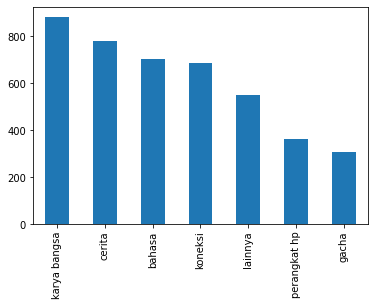

In [ ]:
import matplotlib.pyplot as plt

label_topic = topic_labelling2(clean_klasf, id2word_sets[1], lda_model_2)
df_klasf["topic"] = label_topic
# df_data.to_csv('reviews_clean_klasf_topic_2.csv', index=None, header=True)
print(label_topic)
# print(df_data.topic.value_counts())
df_klasf.topic.value_counts().plot(kind='bar')
plt.show()

In [ ]:
df_klasf

,content,score,text_processed,topic
0,"Game nya bagus sebenernya, tp busuk banget ser...",2,bagus busuk banget servernya dikit dikit hubun...,koneksi
1,Ga bsa di mainkn bru instal pas masuk semua ly...,1,tidak mainkan instal pas masuk layarnya hitam ...,koneksi
2,"Dari segi gameplay bagus, storynya juga menarik",5,segi gameplay bagus tarik,cerita
3,Mantap ni game.. game play bagus.. story bagus...,5,play bagus story bagus suka banget battle sema...,bahasa
4,Tolong kembangkan menjadi game yang mirip deng...,5,tolong kembangkan pokemon go,cerita
...,...,...,...,...
4271,kok saat mau masuk kenapa asset checking failed?,5,masuk asset checking failed,koneksi
4272,Waah akhirnya launching juga.(ﾉ◕ヮ◕)ﾉ*.✧ Semoga...,5,waah launching moga code atma jembatan makhluk...,lainnya
4273,"Suka banget, Banyak Mitologi yang ada. Game Mo...",5,suka banget mitologi mobile folklor nusantara,cerita
4274,Salah satu game indo terkeren yg pernah gue coba,5,salah indonesia keren coba,karya bangsa


In [ ]:
# from itertools import chain

# lda_corpus = lda_model[corpus_tfidf_sets[1]]
# print(len(lda_corpus))
# print(lda_corpus[2])
# # Find the threshold, let's set the threshold to be 1/#clusters,
# # To prove that the threshold is sane, we average the sum of all probabilities:
# scores = list(chain(*[[score for topic_id,score in topic] \
#                      for topic in [doc for doc in lda_corpus]]))

# treshold = sum(scores)/len(scores)
# print(treshold)

# for t in range(len(topic_tuple)):  

#     key_words.append([topic_tuple[t][j][0] for j in range(num_words)])
#     df_key_words = pd.DataFrame({'key_words' : key_words})

#     documents_corpus.append([j for i,j in zip(lda_corpus,doc_set) if i[t][1] > threshold])
#     df_documents_corpus = pd.DataFrame({'documents_corpus' : documents_corpus})

#     documents_corpus_id.append([i for d,i in zip(lda_corpus, doc_set_id) if d[t][1] > threshold])
#     df_documents_corpus_id = pd.DataFrame({'documents_corpus_id' : documents_corpus_id})


# result.append(pd.concat([df_key_words, df_documents_corpus, df_documents_corpus_id ], axis=1))
# reverse_map = dict((lda_model.id2word[id],id) for id in lda_model.id2word)
# print(reverse_map)

4066
[(0, 0.0475969), (1, 0.048303656), (2, 0.048354056), (3, 0.047613934), (4, 0.053203817), (5, 0.048293363), (6, 0.05136822), (7, 0.607654), (8, 0.04761211)]
0.11111111109472122
